# Playing aorund with API's and candle stick graphs

In [11]:
import requests
import pandas as pd

base_url = 'https://www.alphavantage.co/'
end_point = 'query'
res = requests.get(base_url + end_point, params = {'function': 'DIGITAL_CURRENCY_DAILY', 'symbol':'BTC', 'market':'CNY', 'apikey':'HY0Q5I2B84NFJQQ6'})




In [12]:
json = res.json()
df = pd.DataFrame(json['Time Series (Digital Currency Daily)'])
new_df = df.transpose()
new_df
usd = new_df.filter(like='USD')

usd['volume'] = new_df['5. volume']
usd['4b. close (USD)'] = pd.to_numeric(usd['4b. close (USD)'])
usd['1b. open (USD)'] = pd.to_numeric(usd['1b. open (USD)'])
usd['change'] = usd['4b. close (USD)'] - usd['1b. open (USD)']
usd['percent_change'] = (usd['change'] / usd['1b. open (USD)']) * 100
usd

C:\Users\tomtf\AppData\Local\Temp/ipykernel_22456/3473433473.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd['volume'] = new_df['5. volume']
C:\Users\tomtf\AppData\Local\Temp/ipykernel_22456/3473433473.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usd['4b. close (USD)'] = pd.to_numeric(usd['4b. close (USD)'])
C:\Users\tomtf\AppData\Local\Temp/ipykernel_22456/3473433473.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,1b. open (USD),2b. high (USD),3b. low (USD),4b. close (USD),6. market cap (USD),volume,change,percent_change
2022-04-01,45510.35,45644.86000000,45351.73000000,45525.83,1209.90628000,1209.90628000,15.48,0.034014
2022-03-31,47067.99,47600.00000000,45200.00000000,45510.34,48645.12667000,48645.12667000,-1557.65,-3.309362
2022-03-30,47434.79,47700.22000000,46445.42000000,47067.99,40947.20850000,40947.20850000,-366.80,-0.773272
2022-03-29,47122.21,48096.47000000,46950.85000000,47434.80,36772.28457000,36772.28457000,312.59,0.663360
2022-03-28,46827.76,48189.84000000,46663.56000000,47122.21,58949.26140000,58949.26140000,294.45,0.628794
...,...,...,...,...,...,...,...,...
2019-07-11,12108.11,12111.73000000,11000.00000000,11342.89,87506.46105800,87506.46105800,-765.22,-6.319896
2019-07-10,12548.51,13147.08000000,11569.00000000,12108.37,109246.04499700,109246.04499700,-440.14,-3.507508
2019-07-09,12238.60,12794.73000000,12068.00000000,12543.41,78442.13034300,78442.13034300,304.81,2.490563
2019-07-08,11410.00,12338.03000000,11220.00000000,12238.60,52182.36721500,52182.36721500,828.60,7.262051


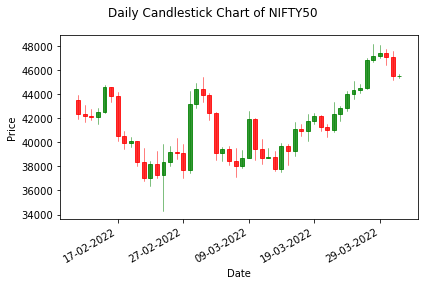

In [13]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mpl_dates
import datetime as dt

ohlc = usd.loc[:, ['1b. open (USD)', '2b. high (USD)', '3b. low (USD)', '4b. close (USD)']]
ohlc = ohlc[:50]



ohlc = ohlc.reset_index()
ohlc['1b. open (USD)'] = pd.to_numeric(ohlc['1b. open (USD)'])
ohlc['2b. high (USD)'] = pd.to_numeric(ohlc['2b. high (USD)'])
ohlc['3b. low (USD)'] = pd.to_numeric(ohlc['3b. low (USD)'])
ohlc['4b. close (USD)'] = pd.to_numeric(ohlc['4b. close (USD)'])
ohlc['index'] = pd.to_datetime(ohlc['index'])

ohlc['index'] = ohlc['index'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Daily Candlestick Chart of NIFTY50')

date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
fig.tight_layout()

plt.show()

plt.close()